In [18]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.signal import welch
import os
import xarray as xr

In [19]:
# Load bruce dataset, centered in the pyr layer 
lfp_raw = np.load('/cs/projects/OWVinckSWR/Carmen/Bruce_data/LFP_Bruce_Probe1.npy')
print("Shape of lfp: ", lfp_raw.shape)


Shape of lfp:  (27001080, 86)


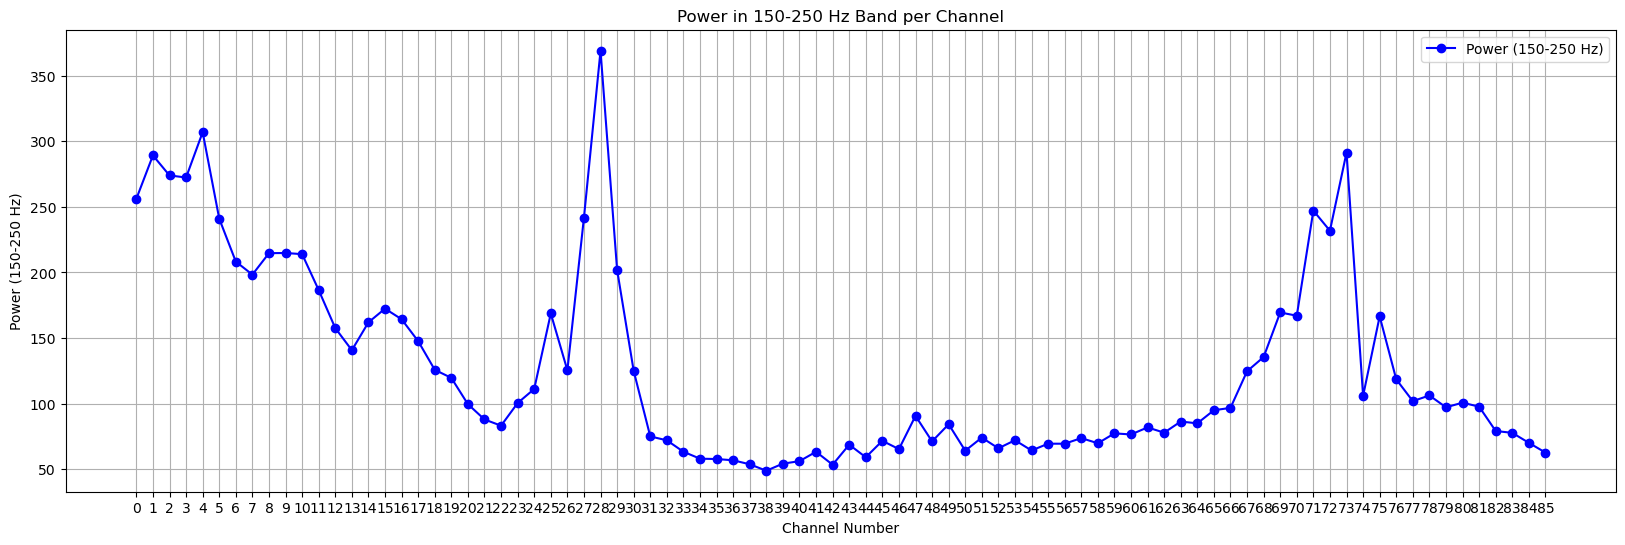

Total power in 150-250 Hz band for each channel: [256.0964   289.14737  273.88895  272.3292   306.8443   240.94505
 208.22816  198.33778  214.6796   214.81871  213.92668  186.52272
 157.5902   140.74786  161.98444  172.41347  164.34819  147.65108
 125.830414 119.6544    99.641914  88.001595  83.250496 100.50703
 111.23199  168.7498   125.461876 241.78548  368.90753  201.9651
 125.01079   75.07217   72.10992   63.403835  58.119175  57.855305
  56.90098   53.854565  48.946045  54.327408  56.221577  63.385372
  53.52224   68.797295  59.20629   71.71798   65.41694   90.72375
  71.28663   84.337906  64.19692   74.17942   66.01172   72.1767
  64.37342   69.534836  69.5273    73.791     69.866455  77.39478
  76.57577   81.942024  77.92398   86.42587   85.03132   95.0354
  96.80465  124.72161  135.55965  169.50595  167.03711  247.1182
 231.76656  291.3101   105.9859   166.54947  118.53938  101.95659
 106.28731   97.2639   100.79289   97.72477   79.18679   77.80895
  70.18839   62.758274]
Chann

In [21]:

# Check which channel from 31-41 has the greater power 
indexes = np.arange(np.min(0), np.max(lfp_raw.shape[1]))

lfp_CA1 = lfp_raw[:,indexes]

# Compute the power of every channel 
lfp_CA1.shape
# Parameters for Welch's method
fs = 1250 
nperseg = 1024  # Number of samples per segment (adjust as necessary)

# Define the frequency band of interest (100-250 Hz)
low_freq = 150
high_freq = 250

# Initialize an empty list to store the total power for each channel in the frequency band
powers = []

# Loop through each channel (11 channels)
for channel_idx in range(lfp_CA1.shape[1]):
    # Extract the channel data
    channel_data = lfp_CA1[:, channel_idx]
    
    # Calculate the Power Spectral Density (PSD) using Welch's method
    freqs, psd = welch(channel_data, fs, nperseg=nperseg)
    
    # Find the indices of the frequencies within the 100-250 Hz band
    band_indices = np.where((freqs >= low_freq) & (freqs <= high_freq))
    
    # Sum the PSD values within the 100-250 Hz band to get total power in this band
    total_power_band = np.sum(psd[band_indices])
    
    # Append the power in the band to the list
    powers.append(total_power_band)

# Convert list to numpy array for easier manipulation
powers = np.array(powers)

# Generate a line plot with dots for power in the frequency band
channels = np.arange(1, lfp_CA1.shape[1] + 1)  # Channel numbers from 1 to 11

plt.figure(figsize=(20, 6))
plt.plot(indexes, powers, marker='o', linestyle='-', color='blue', label='Power (150-250 Hz)')
plt.xlabel('Channel Number')
plt.ylabel('Power (150-250 Hz)')
plt.title('Power in 150-250 Hz Band per Channel')
plt.xticks(indexes)  # Ensure all channel numbers are shown

# Index of the channel with the highest power
max_power_channel = np.argmax(powers)  

# Add grid and legend
plt.grid()
plt.legend()
plt.show()

# Print the results
print(f"Total power in 150-250 Hz band for each channel: {powers}")
print(f"Channel with the highest power in 150-250 Hz band: Channel {max_power_channel} of the list")
print(f"Channel {indexes[max_power_channel]}th from the probe")

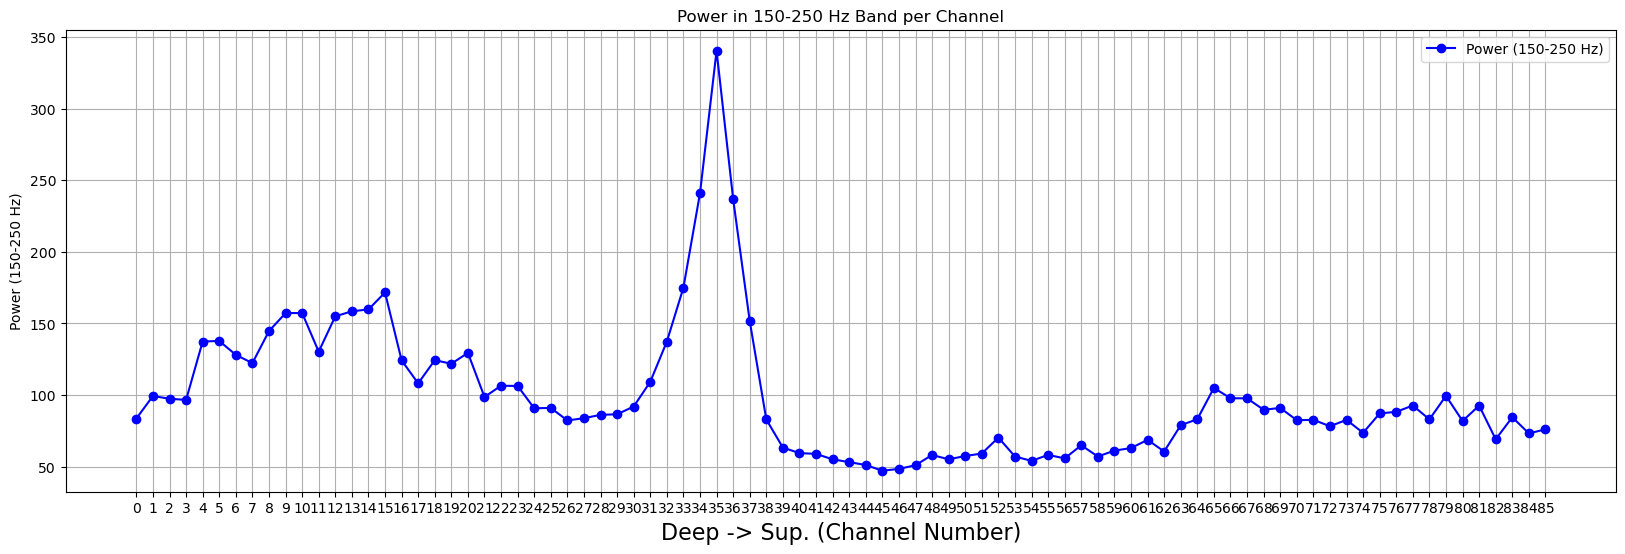

Total power in 150-250 Hz band for each channel: [ 83.65139   99.38523   97.457375  96.66445  137.40846  137.7771
 128.10631  122.33478  144.6893   157.21806  157.3088   130.31807
 154.9728   158.50182  159.77878  171.6262   124.2746   108.207794
 124.37079  121.89609  129.47      98.706795 106.56156  106.37217
  90.830124  91.03454   82.31387   83.89373   86.21645   86.62846
  92.01572  109.27593  137.35916  174.98639  240.83708  340.3456
 236.82845  151.69753   83.0097    63.387325  59.522755  58.99519
  55.165783  53.22719   51.217545  47.22919   48.499542  51.04697
  58.230923  55.180588  57.50662   59.220356  70.364685  57.146515
  54.107162  58.273582  55.841705  64.98535   57.143185  61.268085
  63.035477  68.7871    60.628765  78.98747   83.1861   105.02886
  97.81589   97.75373   89.755455  91.0635    82.497375  82.74823
  78.28313   82.69961   73.66119   87.20923   88.334564  92.73046
  83.06462   99.48242   81.92364   92.678116  69.165726  84.57138
  73.27024   76.12254 ]
Ch

In [4]:

plt.figure(figsize=(20, 6))
plt.plot(indexes, powers, marker='o', linestyle='-', color='blue', label='Power (150-250 Hz)')
plt.xlabel('Channel Number')
plt.xlabel('Deep -> Sup. (Channel Number)', fontsize=16)
plt.ylabel('Power (150-250 Hz)')
plt.title('Power in 150-250 Hz Band per Channel')
plt.xticks(indexes)  # Ensure all channel numbers are shown


# Index of the channel with the highest power
max_power_channel = np.argmax(powers)  

# Add grid and legend
plt.grid()
plt.legend()
plt.show()

# Print the results
print(f"Total power in 150-250 Hz band for each channel: {powers}")
print(f"Channel with the highest power in 150-250 Hz band: Channel {max_power_channel} of the list")
print(f"Channel {indexes[max_power_channel]}th from the probe")

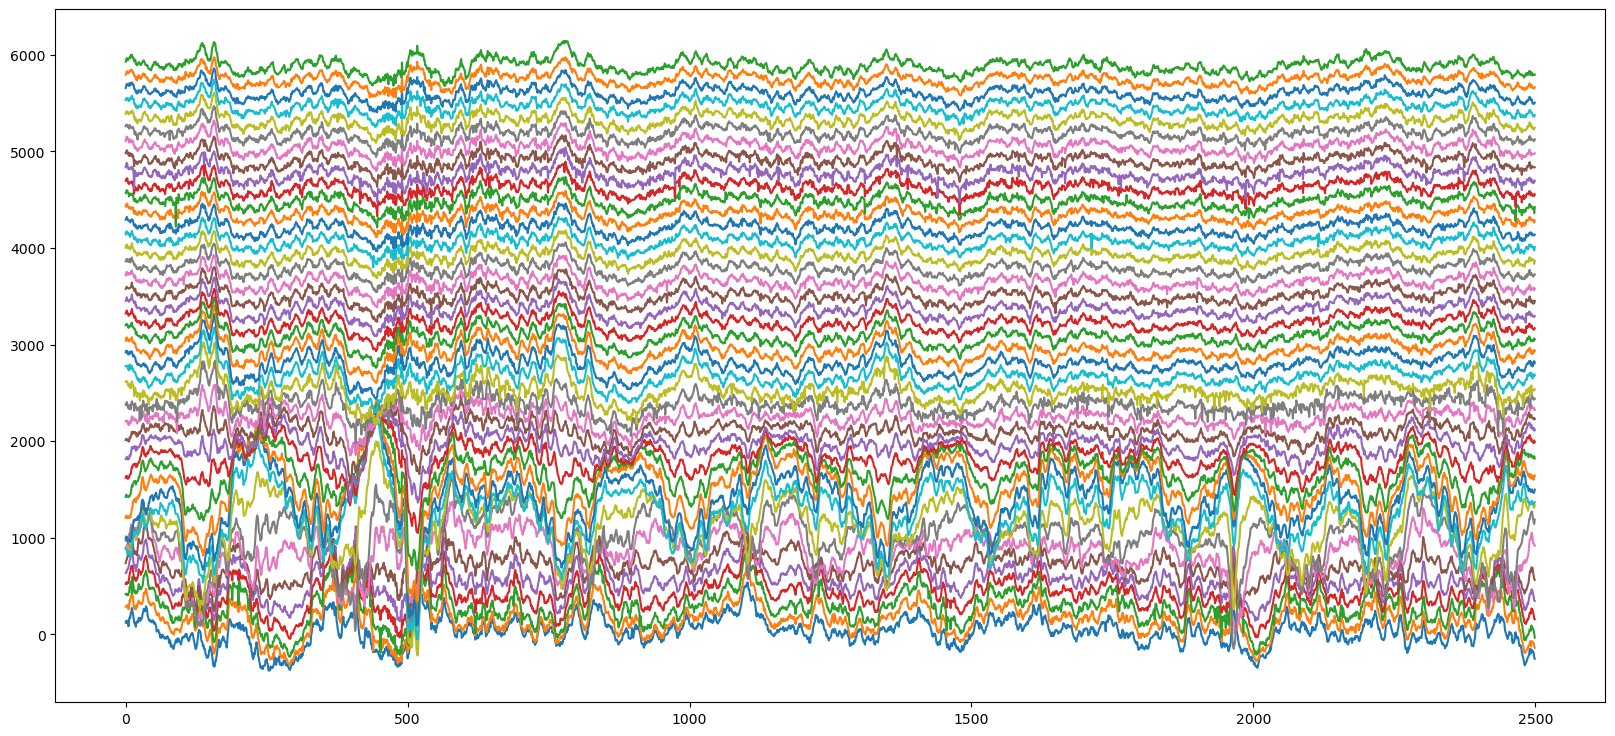

In [5]:

plt.figure(figsize=(20, 9))
start = np.int32(1.5 * 60 * 1250)
end = start + 1250 * 2
for i in range(0, 86, 2):
    plt.plot(lfp_CA1[start:end, i] + i * 70, label=f'Channel {i + 1}')



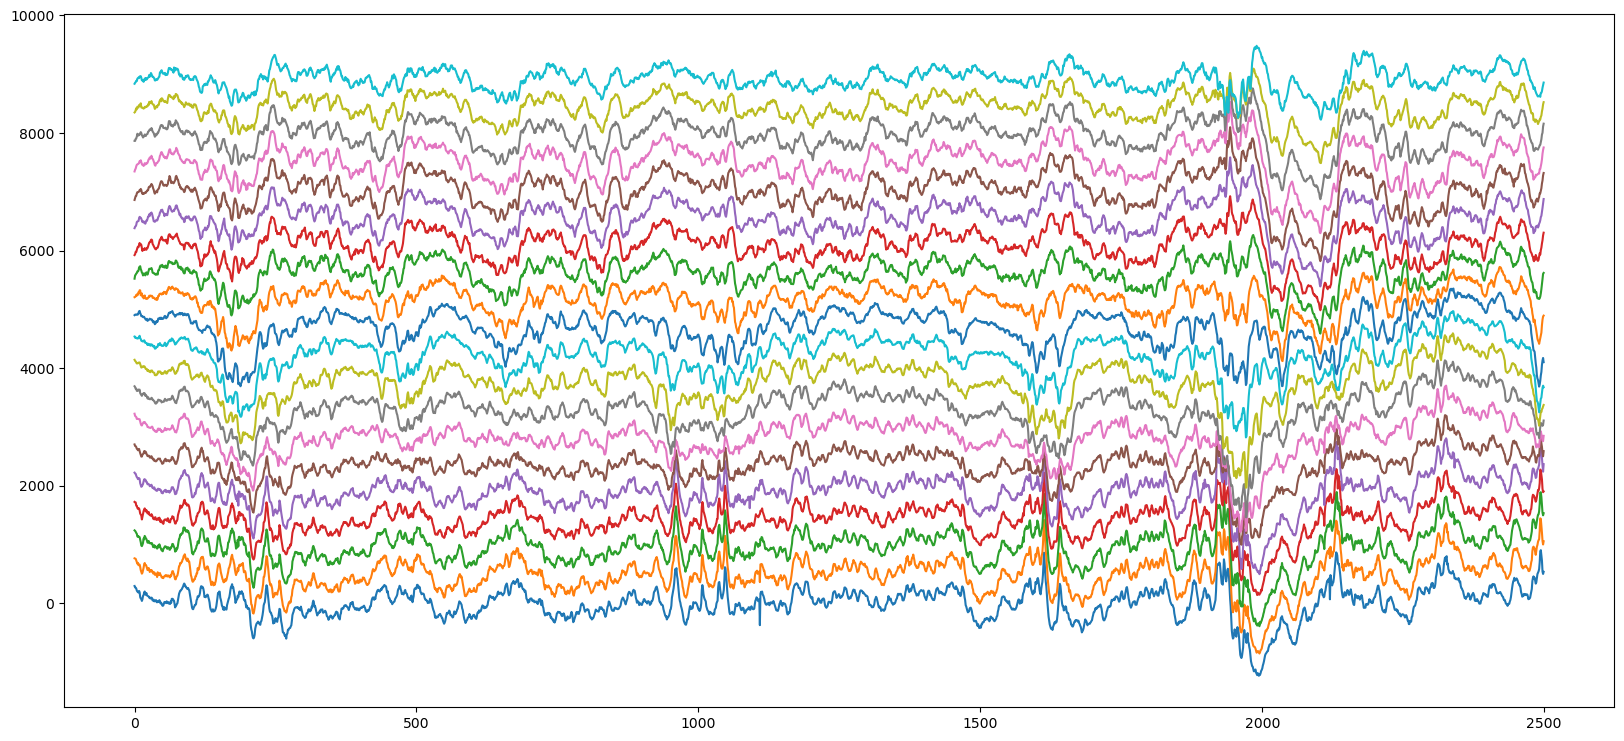

In [8]:
# Sleep starts in 4.5h
plt.figure(figsize=(20, 9))
start = np.int32(5.5 * 60 * 1250)
end = start + 1250 * 2
for i in range(0, 20, 1):
    plt.plot(lfp_CA1[start:end, i] + i * 470, label=f'Channel {i + 1}')

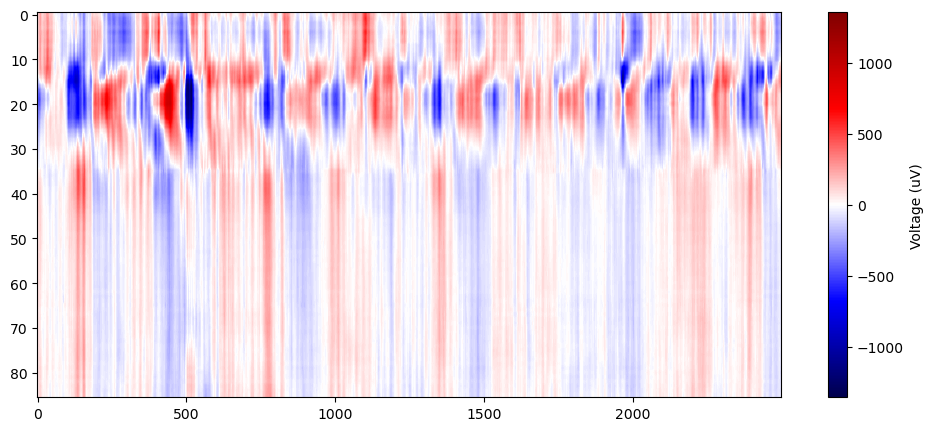

In [6]:
# imshow plot 
# No sleep
start = np.int32(1.5 * 60 * 1250)
end = start + 1250 * 2
plt.figure(figsize=(12, 5))
plt.imshow(lfp_CA1[start:end, :].T, aspect='auto', cmap='seismic', vmin=np.min(lfp_CA1[start:end]), vmax=-np.min(lfp_CA1[start:end]))
plt.colorbar(label='Voltage (uV)')
plt.show()

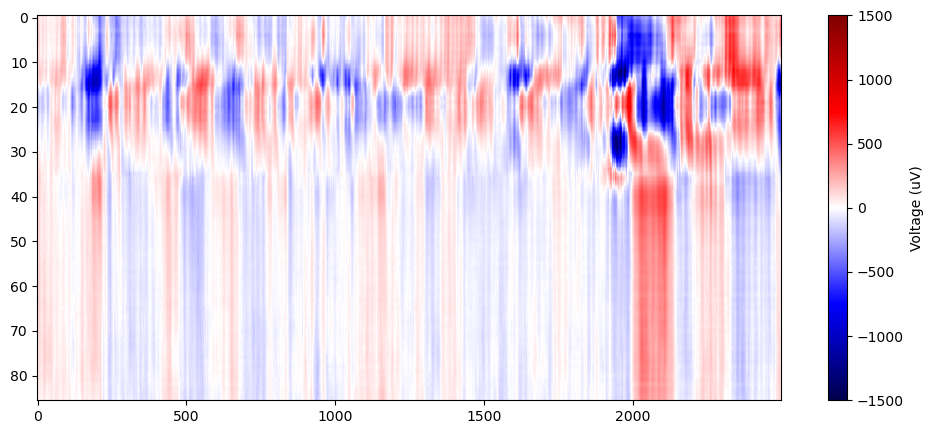

In [7]:
# sleep
start = np.int32(5.5 * 60 * 1250)
end = start + 1250 * 2
plt.figure(figsize=(12, 5))
plt.imshow(lfp_CA1[start:end, :].T, aspect='auto', cmap='seismic', vmin=np.min(lfp_CA1[start:end]),  vmax=-np.min(lfp_CA1[start:end]))
plt.colorbar(label='Voltage (uV)')
plt.show()

In [76]:
lfp

array([[-340.5  , -362.   , -336.   , ...,  -30.22 ,   53.44 ,  -42.12 ],
       [-223.2  , -225.8  , -154.5  , ...,   15.6  ,   28.28 ,   -3.51 ],
       [-195.4  , -186.2  , -122.06 , ...,    7.215,   21.64 ,  -13.84 ],
       ...,
       [1297.   , 1437.   , 1421.   , ...,  -64.94 ,  -66.9  ,  -66.7  ],
       [1141.   , 1279.   , 1274.   , ...,  -76.25 ,  -66.1  ,  -67.25 ],
       [ 971.   , 1071.   , 1070.   , ...,  -84.25 ,  -73.9  ,  -82.5  ]],
      dtype=float16)

In [75]:
loaded_data_raw_allen 

array([[ 7.4099999e-06,  4.4264998e-05,  2.0280000e-05, ...,
        -7.8000003e-06, -3.6465000e-05, -1.2675000e-05],
       [-5.1675001e-05,  2.5350000e-06, -9.1649999e-06, ...,
        -1.6380000e-05, -2.2230000e-05, -2.5935000e-05],
       [-7.8974997e-05, -2.7104999e-05, -3.2759999e-05, ...,
        -2.4765000e-05, -1.7355000e-05, -2.6714999e-05],
       ...,
       [-1.1563500e-04, -1.9422000e-04, -1.9831500e-04, ...,
         8.5800002e-06, -5.7329999e-05, -1.6185000e-05],
       [-1.4547000e-04, -2.0728500e-04, -2.2931999e-04, ...,
         1.5989999e-05, -5.4990000e-05, -1.9110001e-05],
       [-1.8115500e-04, -2.4667499e-04, -2.6071499e-04, ...,
         1.0335000e-05, -3.6465000e-05, -6.6299999e-06]], dtype=float32)

In [16]:
#loading M1     directory = '/cs/projects/OWVinckSWR/DL/predSWR/bruce_dataset/LFP_sanity_check/M1_M2_methods/'
#    np.save(directory + 'ripple_pred_times_M2_allen', y_M2)
M1_times = np.load('/cs/projects/OWVinckSWR/DL/predSWR/bruce_dataset/LFP_sanity_check/M1_M2_methods/ripple_pred_times_M1_bruce.npy')
M1_times.shape
np.where(M1_times == 1)

In [4]:
# Spatial Laplacian of the LFP
import scipy.ndimage
from scipy.ndimage import gaussian_filter
indexes = np.arange(np.min(0), np.max(lfp_raw.shape[1]))
lfp = lfp_raw[:,indexes]/1000000
h = 25e-6 # vertical spacing
fs = 1250
start = 26999246  # ripple in 8445, detected by cnn-ripple
end = start + fs * 60 # seconds interested in
csd = []
for i in range(1,lfp.shape[1]-1):
    csd.append((lfp[start:end,i+1] - 2*lfp[start:end,i] + lfp[start:end,i-1]) / h**2)
csd = np.array(list(csd))
filtered_csd = gaussian_filter(csd, sigma=(5,1))
# Not filtered
plt.figure()
fig, ax = plt.subplots()
ax.pcolormesh(csd)
plt.show()
# Filtered
plt.figure()
fig, ax = plt.subplots()
ax.pcolormesh(filtered_csd)
plt.show()

: 

In [22]:
lfp_max_power = lfp_raw[:,indexes[max_power_channel]]

In [7]:
lfp_max_power.shape

(27001080,)

In [23]:
# Aux functions 
from scipy.signal import butter
from scipy.signal import sosfiltfilt
from scipy.signal import sosfilt
import pywt
from pywt import scale2frequency
from pywt import cwt

def bandpass_filter(signal, low_f, high_f, sampling_rate=1250, filter_order=5):
    '''
    Band pass filter based on the scipy implementation of butterwirth filtering.

    Returns the filtered signal in the specified frequency band.

    Parameters
    ----------
    signal : array-like
        the signal to filter

    low_f : float
        lower bound of the frequency band

    high_f : float
        higher bound of the frequency band

    sampling_rate : float
        sampling rate of the signal, defaults to 1 if not specified

    filter_order : int
        order of the butterwirth filter, defaults to 15 if not specified

    Returns
    -------
    filtered_signal : array-like
        filtered signal

    '''
    filter = butter(filter_order, [low_f, high_f],
                    btype='bandpass', output='sos', fs=sampling_rate)
    filtered_signal = sosfiltfilt(filter, signal)
    return filtered_signal

def get_ripple_times(lfp_envelope, large_thr, small_thr, fs =1250):
    original = np.int32(lfp_envelope > large_thr)
    original_2 = np.int32(lfp_envelope> small_thr)
    
    diff = [original[1] - original[0]]
    diff_2 = [original_2[1] - original_2[0]]
    
    time_onset = []
    time_offset = []
    time_onset_2 = []
    time_offset_2 = []
    
    for i in range(1, len(original)-1):
        diff.append(original[i+1] - original[i])
        if diff[i-1] == 1 and diff[i] == 0: time_onset.append(i)
        if diff[i-1] == 0 and diff[i] == -1 : time_offset.append(i)
    
    for i in range(1, len(original_2)-1):
        diff_2.append(original_2[i+1] - original_2[i])
        if diff_2[i-1] == 1 and diff_2[i] == 0: time_onset_2.append(i)
        if diff_2[i-1] == 0 and diff_2[i] == -1 : time_offset_2.append(i)
    
    # Finding closest values 
    # Want to finde the closest number to time_onset in time_onset_2 
    # time_onset_2 < time_onset
    # time_offset_2 > time_offset
    
    time_onset_out = []
    time_offset_out = []
    for k in time_onset:
        closest_onset = time_onset_2[0]
        for num in time_onset_2:
            if abs(num - k) < abs(closest_onset - k):
                closest_onset = num
            if num > k or num == k:
                break
        time_onset_out.append(closest_onset) 
        
    closest_offset = time_offset_2[0]
    for k in time_offset:    
        for num in time_offset_2:
            if abs(num - k) < abs(closest_offset - k):
                closest_offset = num
            if num > k or num == k:
                break
        time_offset_out.append(closest_offset)
    
    
    # Edge cases 
    if len(time_offset_out) > len(time_onset_out):
        time_onset_out = [0] + time_onset_out  # if session starts with a ripple
    if len(time_offset_out) < len(time_onset_out):
        time_offset_out.append(len(original))  # if session ends with a ripple
    
    times = np.column_stack((time_onset_out, time_offset_out))
    # Can improve with: 
        # Cleaning 
        # Cross for at least 6 ms 
        # Min duration of 50 ms 
        # Max duration ? 
    return times


### M1 method: band-pass + abs + envelope + double thresholding 

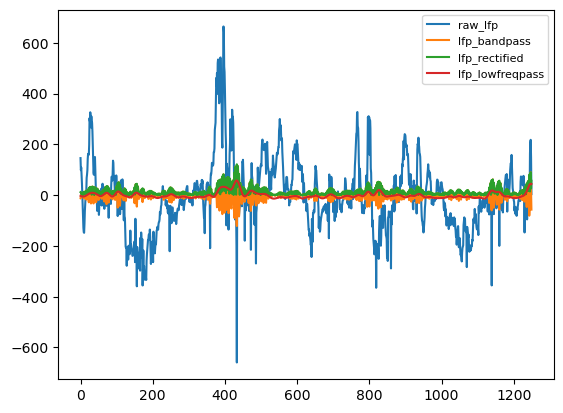

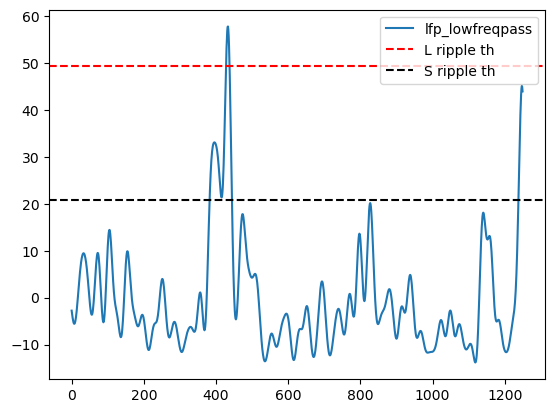

In [24]:
##### BAND-PASS FILTERING 
lfp = lfp_max_power
plt.figure()
fs = 1250
# start = 9905*1250 + np.int64(1250/2)
start = np.int32(1239413 - 150)
end = start + fs 

plt.plot(lfp[start:end]+0.00039, label='raw_lfp')
#we were cheking channel 38 before, now 51
signal = lfp - np.mean(lfp) # get rid of 0 frequency component --> same as raw lfp 
#plt.plot(signal[start:end]+0.00039, label='lfp_no_0')

lfp_bandpass = bandpass_filter(signal, 150, 250, filter_order = 5 )
plt.plot(lfp_bandpass[start:end]+0.00015, label='lfp_bandpass')

# ABSOLUTE VALUE, RECTIFIED 
lfp_abs = np.abs(lfp_bandpass) # needed? after filter everything is bigger than 0
plt.plot(lfp_abs[start:end]+0.00005, label='lfp_rectified') # +0.00005

# LOW-PASS, ENVELOPE
lfp_envelope = bandpass_filter(lfp_abs, 1,50, filter_order = 5 )
plt.plot(lfp_envelope[start:end], label='lfp_lowfreqpass')

plt.legend(fontsize=8)
plt.show() 

# DOUBLE THRESHOLDING 
std = np.std(lfp_abs)
large_thr = 3.1 * std
small_thr = 1.3 * std
# large_thr = 2.5 * std
# small_thr = 1.3 * std

plt.figure()
plt.plot(lfp_envelope[start:end], label='lfp_lowfreqpass')
# plt.plot(lfp_bandpass_2[8444*1250 : 8444 * 1250 + 60 * 20 * 1250], label='lfp_lowfreqpass')
plt.axhline(y=large_thr,linestyle='--',c='r',label='L ripple th')
plt.axhline(y=small_thr,linestyle='--',c='k',label='S ripple th')
plt.legend(fontsize=10)

plt.show()


In [25]:
times_M1 = get_ripple_times(lfp_envelope, large_thr, small_thr, fs =1250)
y_M1 = np.zeros(lfp_max_power.shape[0])
for lab in times_M1:
    y_M1[int(lab[0]*1):int(lab[1]*1)] = 1

### M2 method: band-pass + wavelet transform + power + double thresholding 

In [26]:
# 1 s of data, choosing data from mean luminance grey
fs = 1250 
data = lfp_max_power
dt = 1/fs
lfp_bandpass = bandpass_filter(data, 150, 250, filter_order = 5 )
wavelet = "cmor1.5-1.0"
freqs = np.linspace(100., 300., 20)/fs
scales_to_use = pywt.frequency2scale(wavelet, freqs)
# Filtered
[cfs, frequencies] = pywt.cwt(data=lfp_bandpass, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)

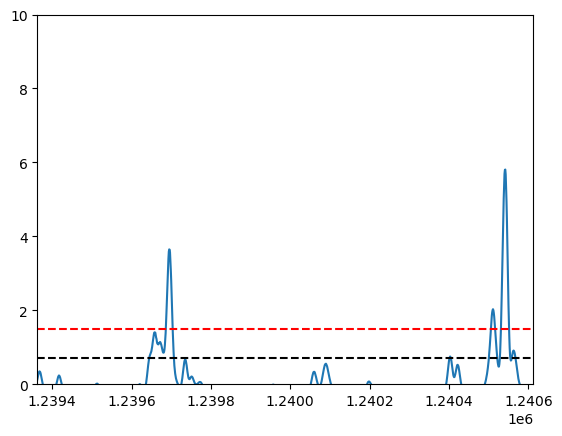

: 

In [27]:
start = 1239413 - 50
end = start + fs 

power_avg = np.mean(np.abs(cfs)**2, axis=0)
zscored_power = zscore(power_avg)

large_thr = 1.5 * np.std(zscored_power)
small_thr = 0.7 * np.std(zscored_power)

plt.figure()
plt.plot(zscored_power)
plt.axhline(y=large_thr,linestyle='--',c='r',label='L ripple th')
plt.axhline(y=small_thr,linestyle='--',c='k',label='S ripple th')
plt.xlim([start, end])
plt.ylim([0, 10])
plt.show()

In [28]:
times_M2 = get_ripple_times(zscored_power, large_thr, small_thr, fs=1250)
print(times_M2.shape)
y_M2 = np.zeros(lfp_max_power.shape[0])
for lab in times_M2:
    y_M2[int(lab[0]*1):int(lab[1]*1)] = 1

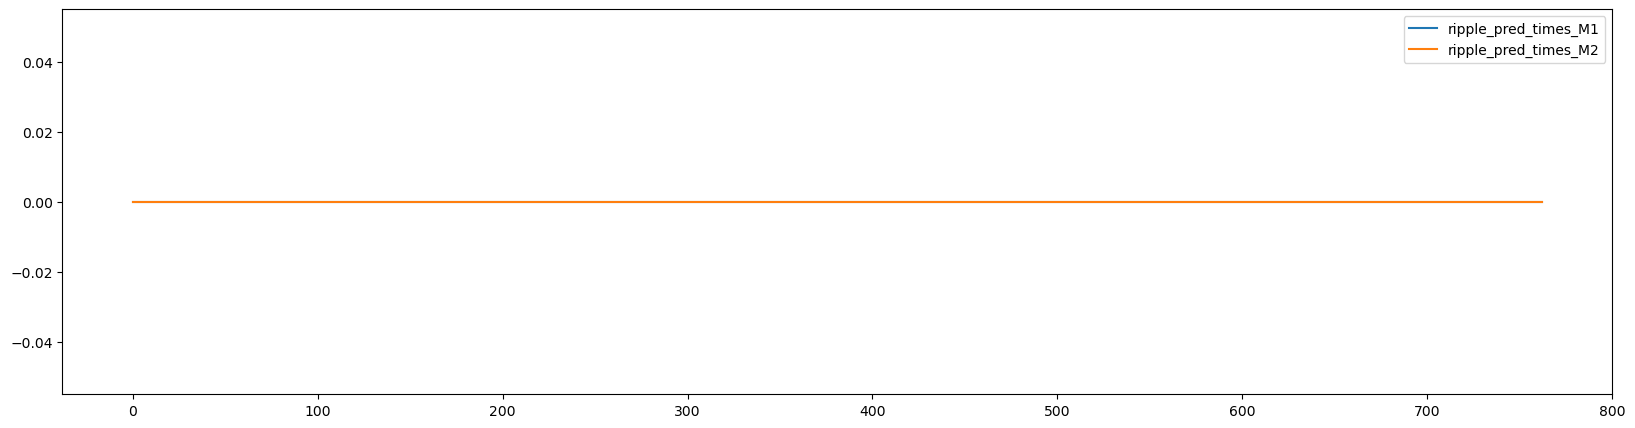

In [16]:
start = 2794491 - 50
end = 2795154 + 50
plt.figure(figsize=(20, 5))
plt.plot(y_M1[start:end], label='ripple_pred_times_M1')
plt.plot(y_M2[start:end], label='ripple_pred_times_M2')
plt.legend()

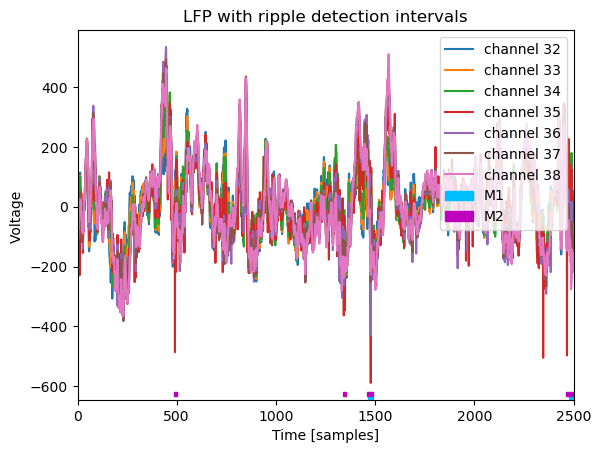

In [17]:
fig, ax = plt.subplots()
lfp = lfp_max_power - np.mean(lfp_max_power, axis=0)
indices = np.arange(indexes[max_power_channel]-3, indexes[max_power_channel]+4)
#lfp = bandpass_filter(lfp, 150, 250, filter_order = 5 )

fs = 1250
start = 1239413 - 200
#end = start + fs/2 
end = start + 1250*2
j = 0.002
for i in indices: 
    lfp_aux = lfp_raw[np.int32(start):np.int32(end),i] - np.mean(lfp_raw[:, i], axis=0)
    #lfp = bandpass_filter(lfp_aux, 150, 250, filter_order = 5 )
    ax.plot(lfp_aux+j, label = f'channel {i}')
    j += 0.001
    
#models = [ripple_pred_times_M1, ripple_pred_times_M2]
#models = [ripple_pred_times_M1, ripple_pred_times_M2, ripple_pred_times_cnn_80, ripple_pred_times_cnn_95,ripple_pred_times_cnn_98, ripple_pred_times_cnn_AI_80, ripple_pred_times_cnn_AI_95]
#names = ['M1', 'M2', 'CNN_80', 'CNN_95','CNN_98','CNN_AI_80','CNN_AI_95']

names = ['M1', 'M2']

#models = [y_M1, y_M2]
models = [times_M1, times_M2]

colors = ["deepskyblue" , "m", "palegreen" ,"hotpink" ,"firebrick", "goldenrod" , "slategrey" ]
k = 0.001
for model,name,color in zip(models,names,colors): 
    for i in range(len(model)): 
        ax.axvspan(model[i][0]-start, model[i][1]-start, k , k+0.012, color=color )
        if i==len(model)-1: ax.axvspan(model[i][0], model[i][1], k , k+0.012, color=color , label=f'{name}')
    k += 0.008
ax.set(xlim=(0, end-start))
ax.legend(loc='upper right')
ax.set_title('LFP with ripple detection intervals')
ax.set_xlabel('Time [samples]')
ax.set_ylabel('Voltage ')
plt.show()

Saving M1 and M2 ripple times 

In [15]:
# Checking shapes 
print("Shape of lfp: ", lfp_max_power.shape)
print("Shape of times_y_M1: ", times_M1.shape)
print("Shape of times_y_M2: ", times_M2.shape)
print("Shape of y_M1: ", y_M1.shape)
print("Shape of y_M2: ", y_M2.shape)

Shape of lfp:  (27001080,)
Shape of times_y_M1:  (10675, 2)
Shape of times_y_M2:  (26790, 2)
Shape of y_M1:  (27001080,)
Shape of y_M2:  (27001080,)


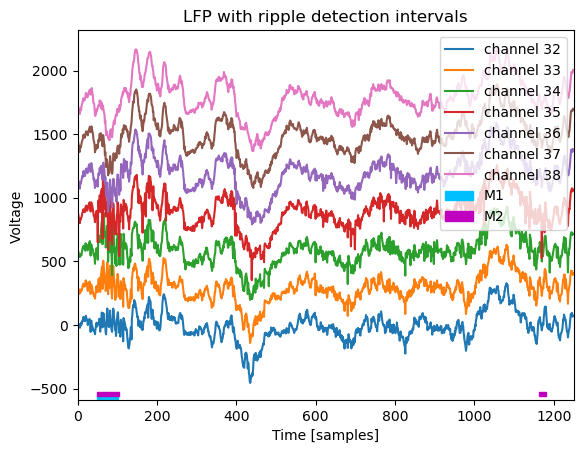

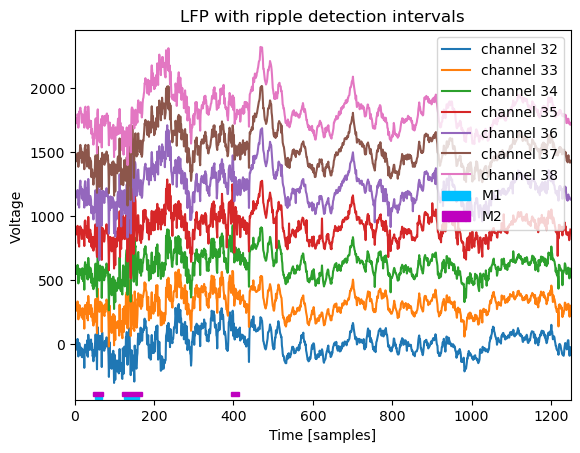

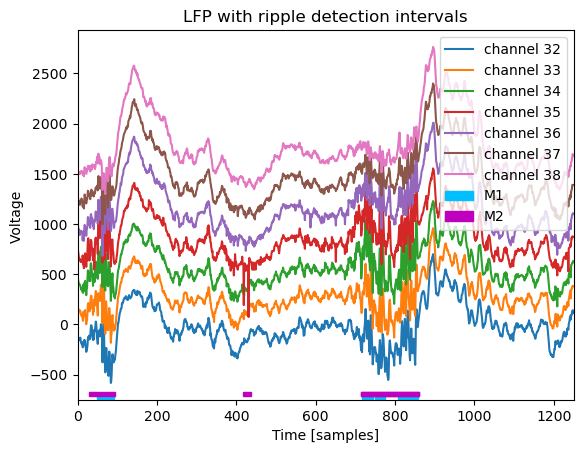

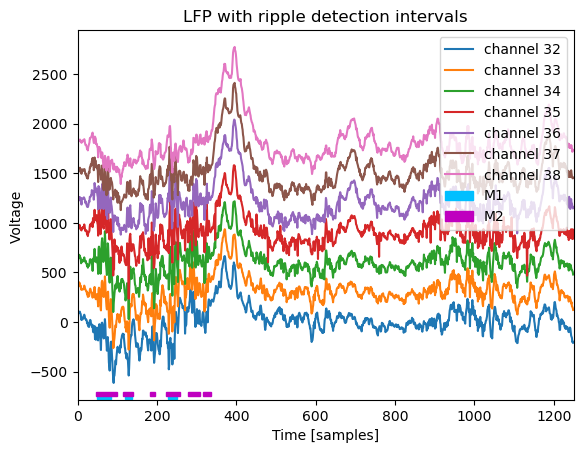

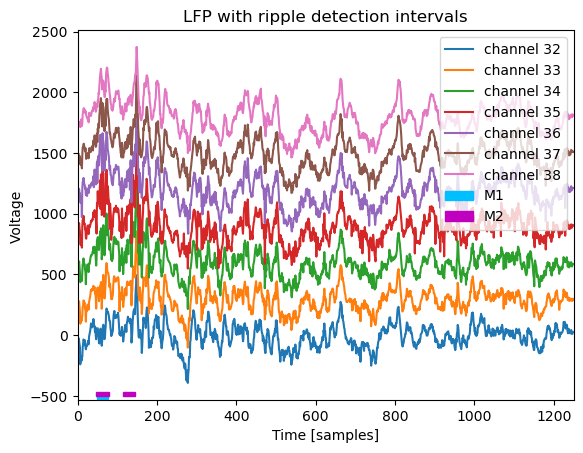

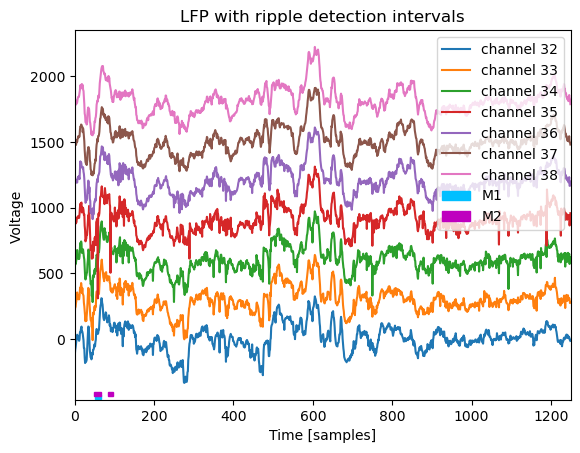

In [32]:
# checking some ripple events, going trough random times_M1 and times_M2 values 

selected_indices = np.linspace(0, len(times_M1) - 1, 13).astype(int) 
start_values = times_M1[selected_indices] 
for start_aux in start_values:
    start = start_aux[0] - 50
    end = start + 1250*1
    fig, ax = plt.subplots()
    lfp = lfp_max_power - np.mean(lfp_max_power, axis=0)
    indices = np.arange(indexes[max_power_channel]-3, indexes[max_power_channel]+4)
    j = 0.002
    for i in indices: 
        lfp_aux = lfp_raw[np.int32(start):np.int32(end),i] - np.mean(lfp_raw[:, i], axis=0)
        #lfp = bandpass_filter(lfp_aux, 150, 250, filter_order = 5 )
        ax.plot(lfp_aux+j, label = f'channel {i}')
        j += 300.001
        
    #models = [ripple_pred_times_M1, ripple_pred_times_M2]
    #models = [ripple_pred_times_M1, ripple_pred_times_M2, ripple_pred_times_cnn_80, ripple_pred_times_cnn_95,ripple_pred_times_cnn_98, ripple_pred_times_cnn_AI_80, ripple_pred_times_cnn_AI_95]
    #names = ['M1', 'M2', 'CNN_80', 'CNN_95','CNN_98','CNN_AI_80','CNN_AI_95']

    names = ['M1', 'M2']

    #models = [y_M1, y_M2]
    models = [times_M1, times_M2]

    colors = ["deepskyblue" , "m", "palegreen" ,"hotpink" ,"firebrick", "goldenrod" , "slategrey" ]
    k = 0.001
    for model,name,color in zip(models,names,colors): 
        for i in range(len(model)): 
            ax.axvspan(model[i][0]-start, model[i][1]-start, k , k+0.012, color=color )
            if i==len(model)-1: ax.axvspan(model[i][0], model[i][1], k , k+0.012, color=color , label=f'{name}')
        k += 0.008
    ax.set(xlim=(0, end-start))
    ax.legend(loc='upper right')
    ax.set_title('LFP with ripple detection intervals')
    ax.set_xlabel('Time [samples]')
    ax.set_ylabel('Voltage ')
    plt.show()


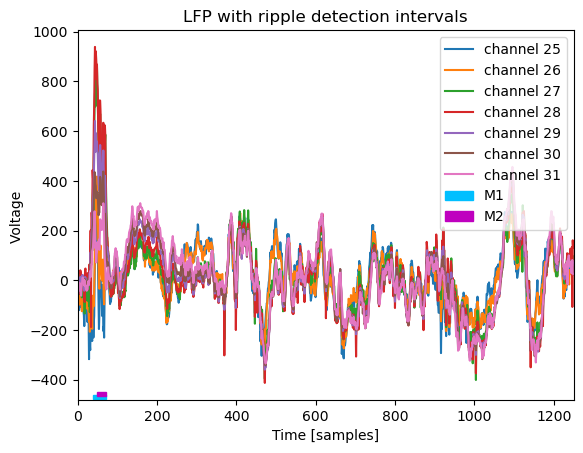

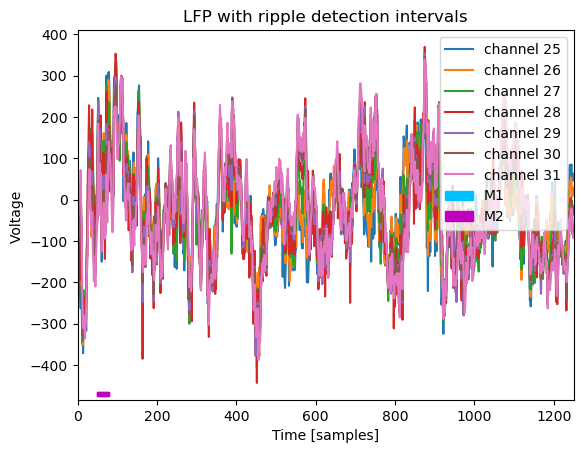

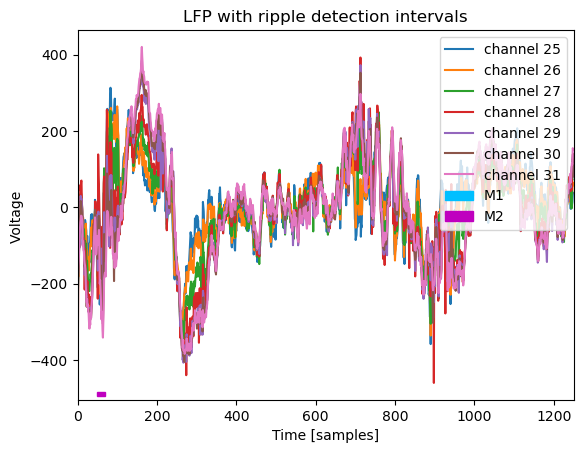

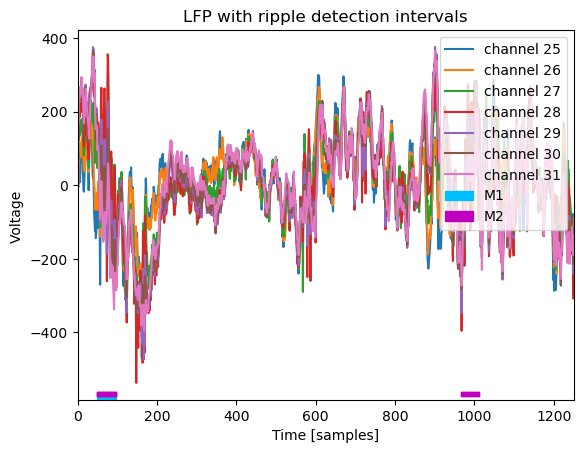

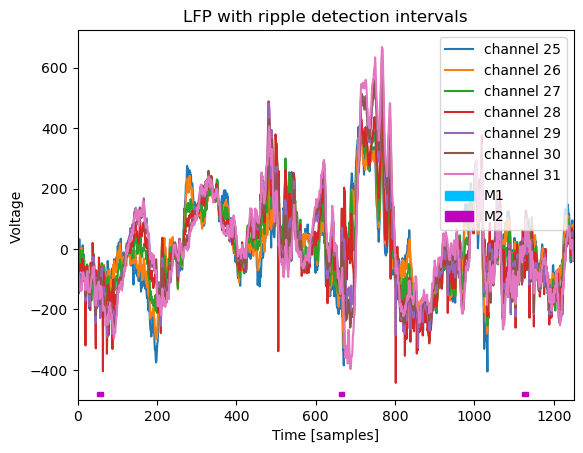

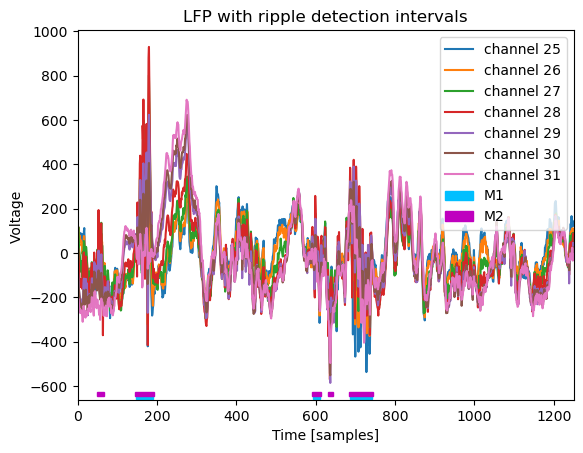

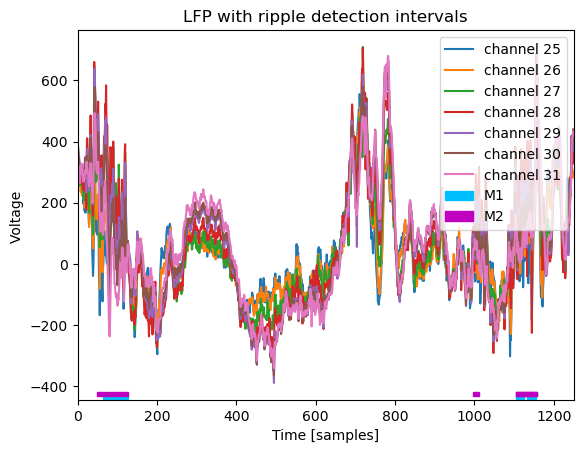

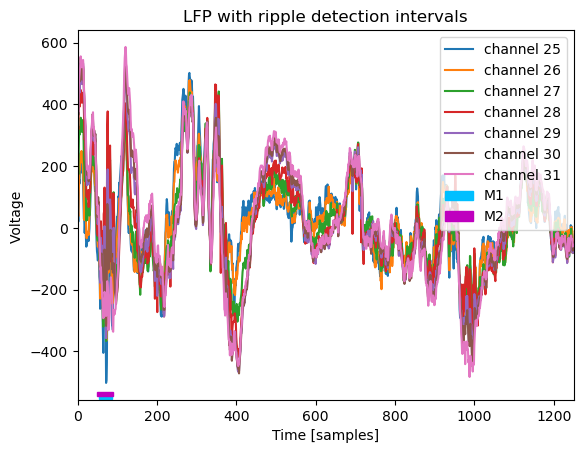

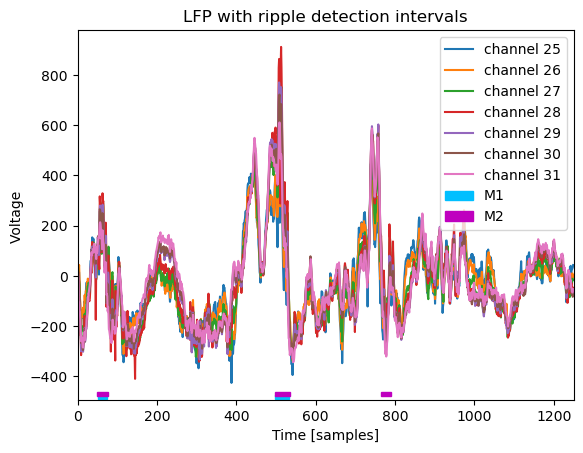

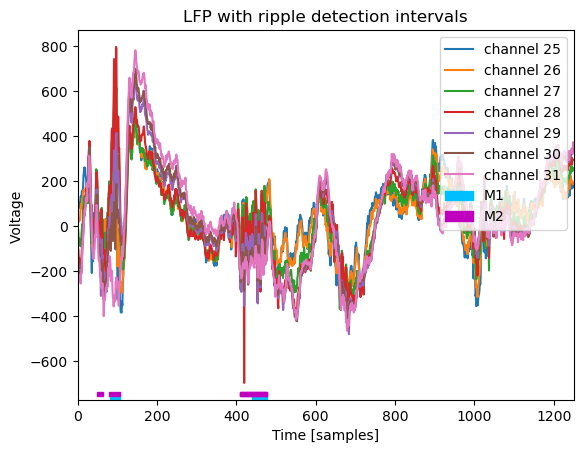

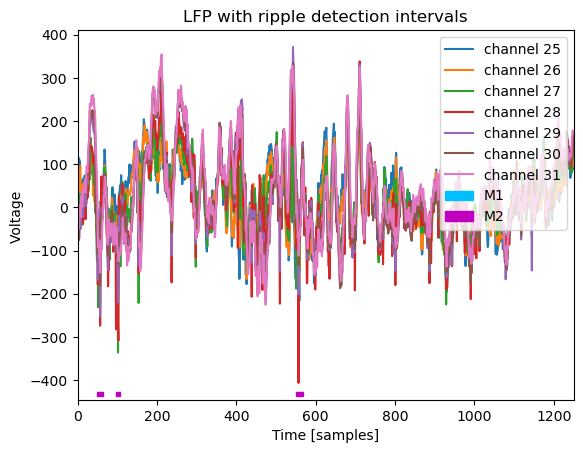

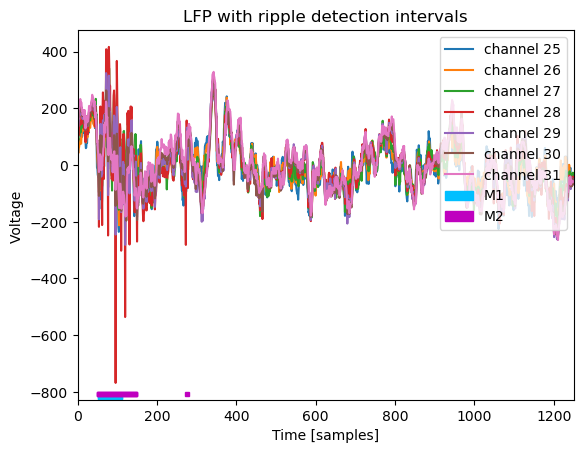

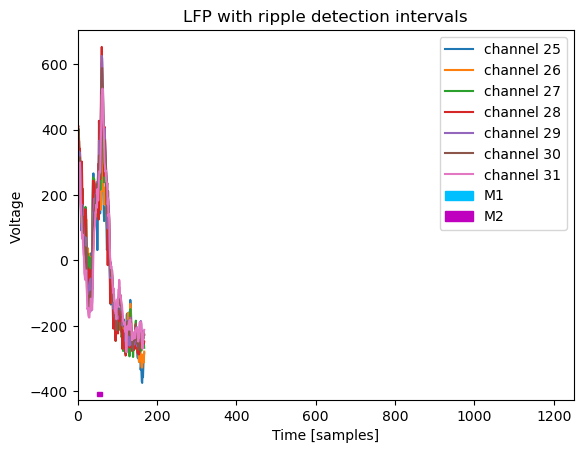

In [57]:
# checking some ripple events, going trough random times_M1 and times_M2 values 
selected_indices = np.linspace(0, len(times_M2) - 1, 13).astype(int) 
start_values = times_M2[selected_indices] 
for start_aux in start_values:
    start = start_aux[0] - 50
    end = start + 1250*1
    fig, ax = plt.subplots()
    lfp = lfp_max_power - np.mean(lfp_max_power, axis=0)
    indices = np.arange(indexes[max_power_channel]-3, indexes[max_power_channel]+4)
    j = 0.002
    for i in indices: 
        lfp_aux = lfp_raw[np.int32(start):np.int32(end),i] - np.mean(lfp_raw[:, i], axis=0)
        #lfp = bandpass_filter(lfp_aux, 150, 250, filter_order = 5 )
        ax.plot(lfp_aux+j, label = f'channel {i}')
        j += 0.001
        
    #models = [ripple_pred_times_M1, ripple_pred_times_M2]
    #models = [ripple_pred_times_M1, ripple_pred_times_M2, ripple_pred_times_cnn_80, ripple_pred_times_cnn_95,ripple_pred_times_cnn_98, ripple_pred_times_cnn_AI_80, ripple_pred_times_cnn_AI_95]
    #names = ['M1', 'M2', 'CNN_80', 'CNN_95','CNN_98','CNN_AI_80','CNN_AI_95']

    names = ['M1', 'M2']

    #models = [y_M1, y_M2]
    models = [times_M1, times_M2]

    colors = ["deepskyblue" , "m", "palegreen" ,"hotpink" ,"firebrick", "goldenrod" , "slategrey" ]
    k = 0.001
    for model,name,color in zip(models,names,colors): 
        for i in range(len(model)): 
            ax.axvspan(model[i][0]-start, model[i][1]-start, k , k+0.012, color=color )
            if i==len(model)-1: ax.axvspan(model[i][0], model[i][1], k , k+0.012, color=color , label=f'{name}')
        k += 0.008
    ax.set(xlim=(0, end-start))
    ax.legend(loc='upper right')
    ax.set_title('LFP with ripple detection intervals')
    ax.set_xlabel('Time [samples]')
    ax.set_ylabel('Voltage ')
    plt.show()


In [17]:
# Saving ripple times
save_M1 = True
save_M2 = True

if save_M1: 
    print('Saving data..')      
    directory = '/cs/projects/OWVinckSWR/DL/predSWR/bruce_dataset/LFP_sanity_check/M1_M2_methods/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    np.save(directory + 'ripple_pred_times_M1_bruce_probe1', y_M1)
    print('Done!')


if save_M2: 
    print('Saving data..')      
    directory = '/cs/projects/OWVinckSWR/DL/predSWR/bruce_dataset/LFP_sanity_check/M1_M2_methods/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    np.save(directory + 'ripple_pred_times_M2_bruce_probe1', y_M2)
    print('Done!')
    

Saving data..
Done!
Saving data..
Done!


In [29]:
indeces= np.int32(np.linspace(49,62,8))
indeces

array([49, 50, 52, 54, 56, 58, 60, 62], dtype=int32)